# Plot some features

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
features_sig=pd.read_hdf("LHCORD_sig_features.h5") #ladda in datafilen mha pandas
features_bg=pd.read_hdf("LHCORD_qcd_features.h5")

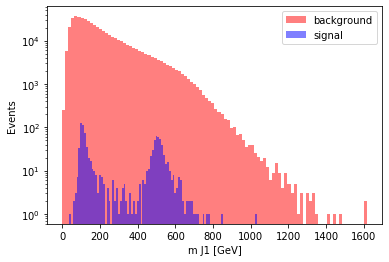

In [46]:
plt.hist(features_bg['mj1'][500000:], bins = 100, fc=(1, 0, 0, 0.5), alpha=0.5, label='background')
plt.hist(features_sig['mj1'][:1000], bins = 100, fc=(0, 0, 1, 0.5), alpha=0.5, label='signal')
plt.yscale('log')
plt.legend(loc='upper right')
plt.xlabel('m J1 [GeV]')
plt.ylabel('Events')
plt.show()

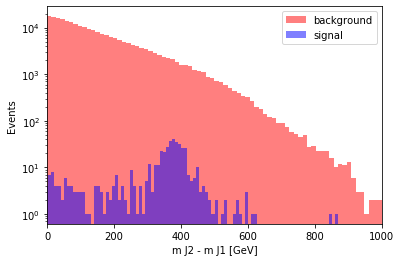

In [47]:
plt.hist((features_bg['mj2'][:500000]-features_bg['mj1'][:500000]), bins = 200, fc=(1, 0, 0, 0.5), alpha=0.5, label='background')
plt.hist((features_sig['mj2'][:1000]-features_sig['mj1'][:1000]), bins = 200, fc=(0, 0, 1, 0.5), alpha=0.5, label='signal')
plt.yscale('log')
plt.xlim(0,1000)
plt.legend(loc='upper right')
plt.xlabel('m J2 - m J1 [GeV]')
plt.ylabel('Events')
plt.show()

# Calculate R(x|m)

### Load the output from the training and exponentiate

In [48]:
pfull_actual = np.load('outer_withsig_epoch_49_Model.par_logPfull_actual.npy')

In [50]:
pbg_actual = np.load('outer_withsig_epoch_49_Model.par_logPbg_actual.npy')

In [51]:
xp_pfull=np.exp(pfull_actual)
xp_pbg=np.exp(pbg_actual)

### Isolate the signal region in the dataset 

In [52]:
dataset_bg[0,0] # First index is the row, second index gives the mJJ element

3.3072193874436437

In [53]:
# Delete all rows of dataset_test_actual where the first element is outside 
# [3.3, 3.7], and save as a new array
sr_dataset = dataset_test_actual[(dataset_test_actual[:,0] >= 3.3) & (dataset_test_actual[:,0] <= 3.7),:]

In [54]:
len(sr_dataset)

60749

In [55]:
sr_dataset_sig = sr_dataset[sr_dataset[:,5] > 0.5,:]
sr_dataset_bg = sr_dataset[sr_dataset[:,5] < 0.5,:]

In [56]:
len(sr_dataset_sig)

381

In [57]:
len(sr_dataset_bg)

60368

### Calculate R for signal and for background 

In [58]:
rx_bg=xp_pfull[0:60368]/xp_pbg[0:60368]

In [59]:
rx_sig=xp_pfull[60368:]/xp_pbg[60368:]

In [60]:
np.argwhere(np.isinf(rx_bg))

array([], shape=(0, 1), dtype=int64)

### Plot R for signal events 

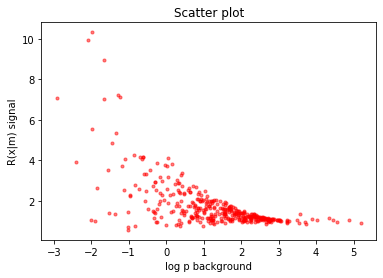

In [62]:
x = pbg_actual[60368:]
y = rx_sig
area = np.pi*3
col = (1,0,0)

# Plot
plt.scatter(x, y, s=area, c=[[1,0,0]], alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('log p background')
plt.ylabel('R(x|m) signal')
#plt.xlim(-2,5)
#plt.ylim(0,5)
plt.show()

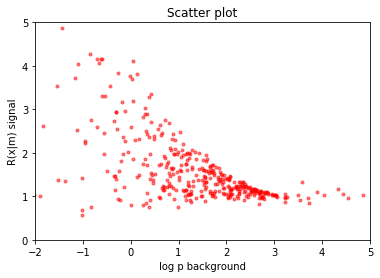

In [63]:
xs = pbg_actual[60368:]
ys = rx_sig
area = np.pi*3
col = (1,0,0)

# Plot
plt.scatter(xs, ys, s=area, c=[[1,0,0]], alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('log p background')
plt.ylabel('R(x|m) signal')
plt.xlim(-2,5)
plt.ylim(0,5)
plt.show()

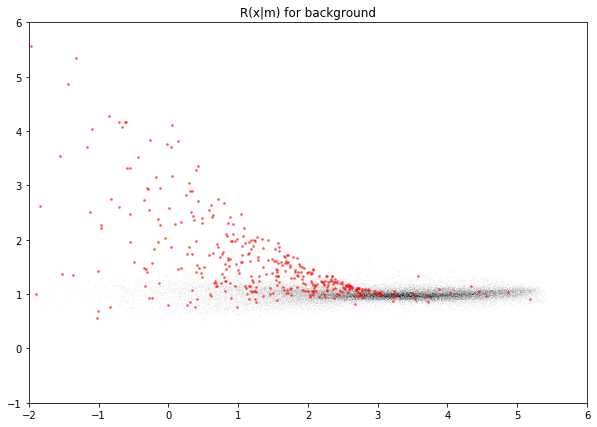

In [69]:
import numpy as np 
import matplotlib.pyplot as plt 
  
# Creating dataset 
x = pbg_actual[:60368]
y = rx_bg
  
# Creating bins 
x_min = -2 
x_max = 6
  
y_min = -1 
y_max = 6
  
x_bins = np.linspace(x_min, x_max, 500) 
y_bins = np.linspace(y_min, y_max, 500) 
  
fig = plt.subplots(figsize =(10, 7)) 
# Creating plot 
plt.hist2d(x, y, bins=[x_bins,y_bins], cmap='binary') 
plt.scatter(xs, ys, s=3, c=[[1,0,0]], alpha=0.5)
plt.title("R(x|m) for background") 
plt.xlim(-2,6)
plt.ylim(-1,6)
  
# show plot 
plt.show() 

# True positives etc

In [70]:
rc = np.arange(-1,25,0.1)
print(len(rc))

260


In [71]:
np.count_nonzero(rx_sig <= 1.3)

182

In [73]:
from numpy import vectorize

def func_fn(x):
     return np.count_nonzero(rx_sig <= x) # jag måste ha vänt på något här, vad som är TP osv
def func_tp(x):
     return np.count_nonzero(rx_sig > x)
    
def func_tn(x):
     return np.count_nonzero(rx_bg <= x)
def func_fp(x):
     return np.count_nonzero(rx_bg > x)
    
vfunc_tn = vectorize(func_tn)
vfunc_tp = vectorize(func_tp)
vfunc_fn = vectorize(func_fn)
vfunc_fp = vectorize(func_fp)

tn = vfunc_tn(rc)
print(tn[:20],len(tn))
tp = vfunc_tp(rc)
print(tp[:20],len(tp))
fn = vfunc_fn(rc)
print(fn[:20],len(fn))
fp = vfunc_fp(rc)
print(fp[:20],len(fp))

[   0    0    0    0    0    0    0    0    0    0    0   11   27   50
  128  247  534 1223 3051 8847] 260
[381 381 381 381 381 381 381 381 381 381 381 381 381 381 381 381 380 379
 374 368] 260
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2  7 13] 260
[60355 60355 60355 60355 60355 60355 60355 60355 60355 60355 60355 60344
 60328 60305 60227 60108 59821 59132 57304 51508] 260


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


In [74]:
tpr = tp/(tp+fn)

In [75]:
fpr = fp/(fp+tn)

In [76]:
print(tpr[:20],len(tpr))
print(fpr[:20],len(fpr))

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.99737533 0.99475066
 0.9816273  0.96587927] 260
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.99981775
 0.99955265 0.99917157 0.99787921 0.99590755 0.99115235 0.97973656
 0.94944909 0.85341728] 260


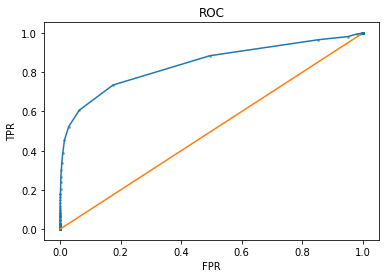

In [84]:
plt.scatter(fpr, tpr, s=3, c=[[0,0.5,0.5]], alpha=0.5)
plt.plot(fpr,tpr)
xlinsp = np.arange(0.0, 1.0, 0.01)
y = xlinsp

plt.plot(xlinsp, y)
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

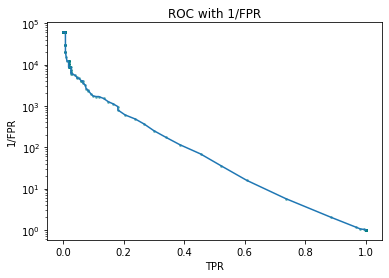

In [85]:
plt.scatter(tpr, 1/fpr, s=3, c=[[0,0.5,0.5]], alpha=0.5)
plt.plot(tpr,1/fpr)
plt.title('ROC with 1/FPR')
plt.xlabel('TPR')
plt.ylabel('1/FPR')
plt.yscale('log')
plt.show()

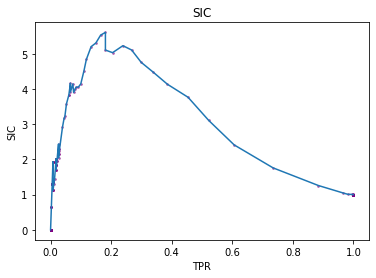

In [86]:
plt.scatter(tpr, tpr/(fpr)**(1/2), s=3, c=[[0.5,0,0.5]], alpha=0.5)
plt.plot(tpr,tpr/(fpr)**(1/2))
plt.title('SIC')
plt.xlabel('TPR')
plt.ylabel('SIC')
plt.show()